กลุ่ม Fruit Recognition จัดทำโดย
1.   ณัทธร เชิงเชาว์ 6209610416
2.   ณัฐนนท์ ราษฎร์บริรักษ์ 6209680799
3.   สิรวิชญ์ คล้ายรัศมี 6209680831

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

โหลดตัวโมเดลหลังจาก train กับชุดข้อมูลไว้แล้ว

In [ ]:
import pickle

FILE_PATH = '/content/drive/MyDrive/fruits_dataset/rgb_dataset/my_model.pkl'
model = pickle.load(open(FILE_PATH, 'rb'))

ทำการครอบรูปเพื่อที่จะครอบรูปเฉพาะรูปผลไม้ที่ต้องการที่ใช้ และจะไม่เลือกรูปที่ตรวจจับผิดพลาด

In [ ]:
def crop_image(img):
  result = img.copy()
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  
  _, binary = cv2.threshold(gray, 225, 255, cv2.THRESH_BINARY_INV)
  contours, hierarchy = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

  arr = []
  res = []
  for c in contours:
    x,y,w,h = cv2.boundingRect(c)
    res.append(x+y+w+h)
    arr.append([x,y,w,h])

  for i in range(len(contours)):
    if sum(arr[i]) == max(res):
      x,y,w,h = arr[i]

  cv2.rectangle(img, (x, y), (x + w, y + h), (36,255,12), 3)
  img_result = result[y:y+h, x:x+w]
  return img_result

สร้าง dictionary ของชื่อผลไม้ต่างๆ

In [ ]:
fruit_dict = {0: 'Apple Braeburn', 1: 'Apple Crimson Snow', 2: 'Apple Golden 1', 3: 'Apple Golden 2', 4: 'Apple Golden 3',
              5: 'Apple Granny Smith', 6: 'Apple Pink Lady', 7: 'Apple Red 1', 8: 'Apple Red 2', 9: 'Apple Red 3',
              10: 'Apple Red Delicious', 11: 'Apple Red Yellow 1', 12: 'Apple Red Yellow 2', 13: 'Apricot', 14: 'Avocado',
              15: 'Banana', 16: 'Banana Lady Finger', 17: 'Blueberry', 18: 'Cantaloupe 1', 19: 'Cantaloupe 2',
              20: 'Carambula', 21: 'Cherry 1', 22: 'Cherry 2', 23: 'Cherry Rainier', 24: 'Cherry Wax Black',
              25: 'Cherry Wax Red', 26: 'Cherry Wax Yellow', 27: 'Clementine', 28: 'Dates', 29: 'Ginger Root',
              30: 'Grape Blue', 31: 'Grape Pink', 32: 'Grape White', 33: 'Grape White 2', 34: 'Grape White 3',
              35: 'Grape White 4', 36: 'Guava', 37: 'Kiwi', 38: 'Lemon', 39: 'Lemon Meyer',
              40: 'Limes', 41: 'Lychee', 42: 'Mandarine', 43: 'Mango', 44: 'Mango Red',
              45: 'Mangostan', 46: 'Mulberry', 47: 'Orange', 48: 'Papaya', 49: 'Passion Fruit',
              50: 'Peach', 51: 'Peach 2', 52: 'Peach Flat', 53: 'Pear', 54: 'Pear 2',
              55: 'Pear Kaiser', 56: 'Pear Monster', 57: 'Pear Red', 58: 'Pear Stone', 59: 'Pear Williams',
              60: 'Pineapple', 61: 'Pineapple Mini', 62: 'Plum', 63: 'Plum 2', 64: 'Pomegranate',
              65: 'Raspberry', 66: 'Salak', 67: 'Strawberry', 68: 'Strawberry Wedge', 69: 'Watermelon'}

จากนั้นนำมาแยกสีของรูปภาพออกมาเป็นสีแดง, สีเขียว, สีน้ำเงินตามลำดับ แล้วใช้หลักสถิติต่างๆมาคำนวนค่าสีทั้ง 3 สี จากนั้น Scaling โดยใช้ Standard Scaler สุดท้ายนำมาทำนายผลลัพธ์ 

In [ ]:
def image_predict(image):
  from scipy.stats import sem
  from sklearn.preprocessing import StandardScaler

  cp_img = crop_image(image)
  (R, G, B) = cv2.split(cp_img)
  X = np.array([np.mean(R), np.mean(G), np.mean(B),
              np.std(R), np.std(G), np.std(B),
              np.median(R), np.median(G), np.median(B),
              sem(R, axis=None, ddof=0), sem(G, axis=None, ddof=0), sem(B, axis=None, ddof=0),
              np.percentile(R, 25), np.percentile(G, 25), np.percentile(B, 25),
              np.percentile(R, 50), np.percentile(G, 50), np.percentile(B, 50),
              np.percentile(R, 75), np.percentile(G, 75), np.percentile(B, 75)])
  
  scaler = StandardScaler()
  X_scaled = scaler.fit_transform(X.reshape(1, -1))

  y_pred = model.predict(X_scaled)
  img_result = fruit_dict[y_pred[0]]

  return img_result

แสดงผลลัพธ์หลังจากทำนายกับโมเดล

Apple Red 3


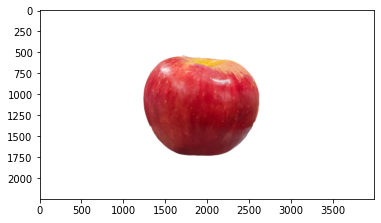

In [ ]:
IMG_PATH = '/content/drive/MyDrive/fruits_dataset/test_image/test1.jpg'
img = cv2.imread(IMG_PATH, cv2.COLOR_BGR2RGB)
print(image_predict(img))
plt.imshow(img[:,:,::-1])
plt.show()

Apple Red 3


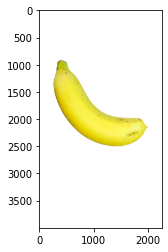

In [ ]:
IMG_PATH = '/content/drive/MyDrive/fruits_dataset/test_image/test2.jpg'
img2 = cv2.imread(IMG_PATH, cv2.COLOR_BGR2RGB)
print(image_predict(img2))
plt.imshow(img2[:,:,::-1])
plt.show()

Apple Red 3


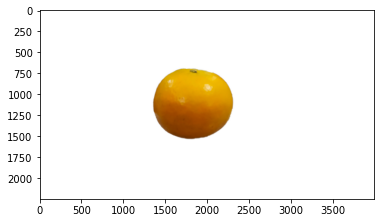

In [ ]:
IMG_PATH = '/content/drive/MyDrive/fruits_dataset/test_image/test3.jpg'
img3 = cv2.imread(IMG_PATH, cv2.COLOR_BGR2RGB)
print(image_predict(img3))
plt.imshow(img3[:,:,::-1])
plt.show()